In [5]:
library(tidyverse) 
library(tibbletime)
library(anomalize) 
library(lubridate)

k = 1.5
options(repr.plot.width=6*k, repr.plot.height=5*k)

In [2]:
air = tibble(pass = AirPassengers)
n = nrow(air)
air2 = mutate(air, date = ymd('1949-01-01') +
                months(0:(n - 1)))

In [3]:
air2

pass,date
<ts>,<date>
112,1949-01-01
118,1949-02-01
132,1949-03-01
129,1949-04-01
121,1949-05-01
135,1949-06-01
148,1949-07-01
148,1949-08-01
136,1949-09-01


Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


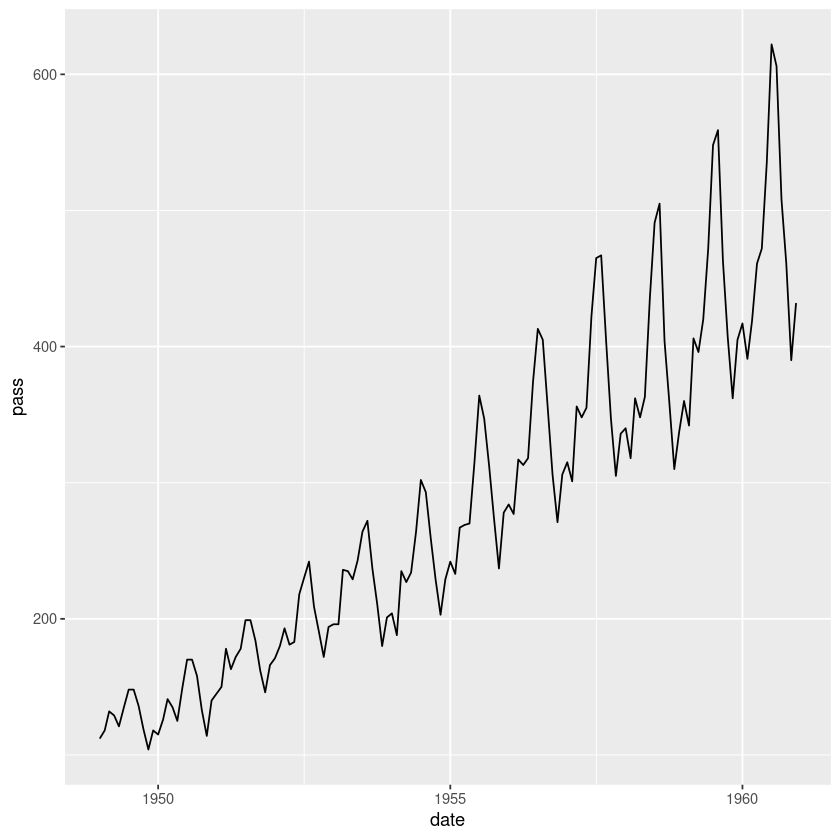

In [4]:
qplot(data=air2, x=date, y=pass, geom='line')

In [6]:
air3 = mutate(air2, ln_pass=log(pass))
air3

pass,date,ln_pass
<ts>,<date>,<ts>
112,1949-01-01,4.718499
118,1949-02-01,4.770685
132,1949-03-01,4.882802
129,1949-04-01,4.859812
121,1949-05-01,4.795791
135,1949-06-01,4.905275
148,1949-07-01,4.997212
148,1949-08-01,4.997212
136,1949-09-01,4.912655


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


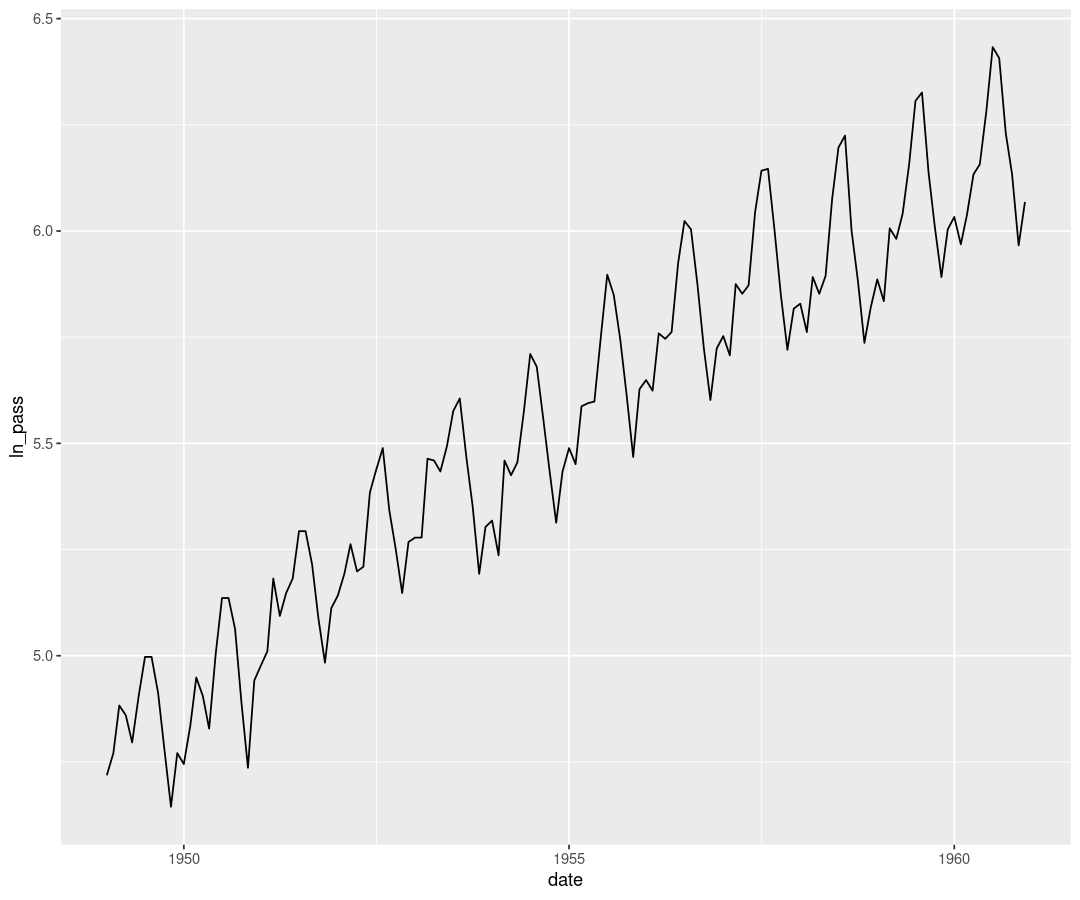

In [8]:
qplot(data=air3, x=date, y=ln_pass, geom='line')

In [9]:
air4 = mutate(air3, ln_pass_an = ln_pass)
air4$ln_pass_an[30] = 6
air4$ln_pass_an[110] = 5.3

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


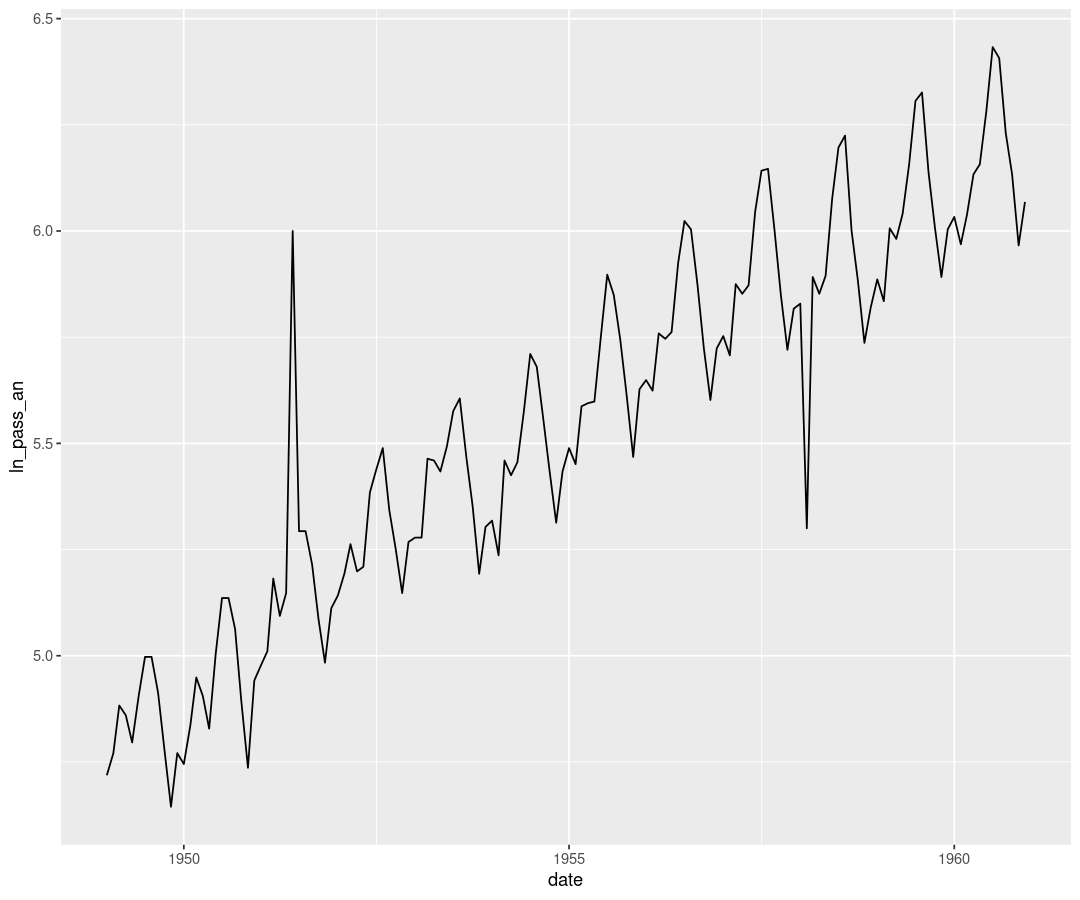

In [10]:
qplot(data=air4, x=date, y=ln_pass_an, geom='line')

In [13]:
decomp <- time_decompose(air4, target = ln_pass_an)

Converting from tbl_df to tbl_time.
Auto-index message: index = date

frequency = 12 months

trend = 36 months



In [15]:
decomp2 <- anomalize(decomp, target = remainder)

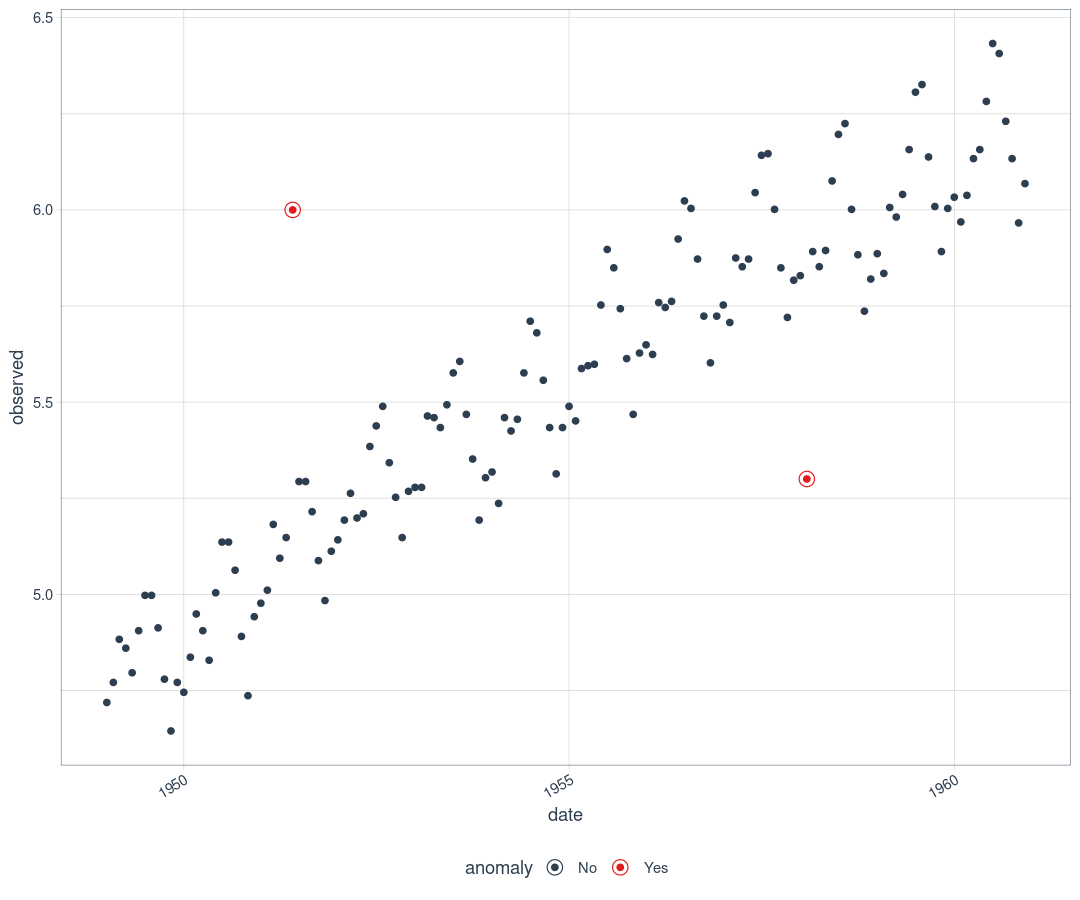

In [18]:
plot_anomalies(decomp2)

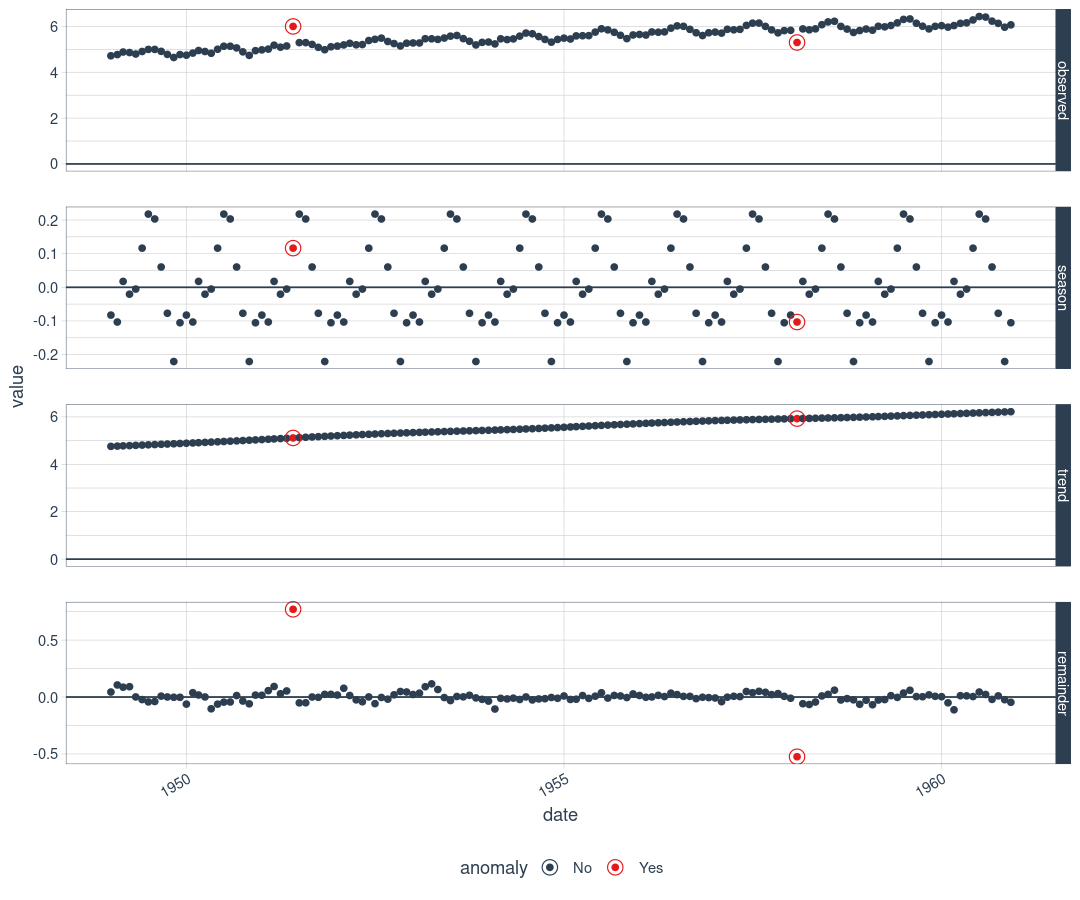

In [20]:
plot_anomaly_decomposition(decomp2)

In [22]:
decomp3 <- time_recompose(decomp2)

In [24]:
decomp4 <- clean_anomalies(decomp3)

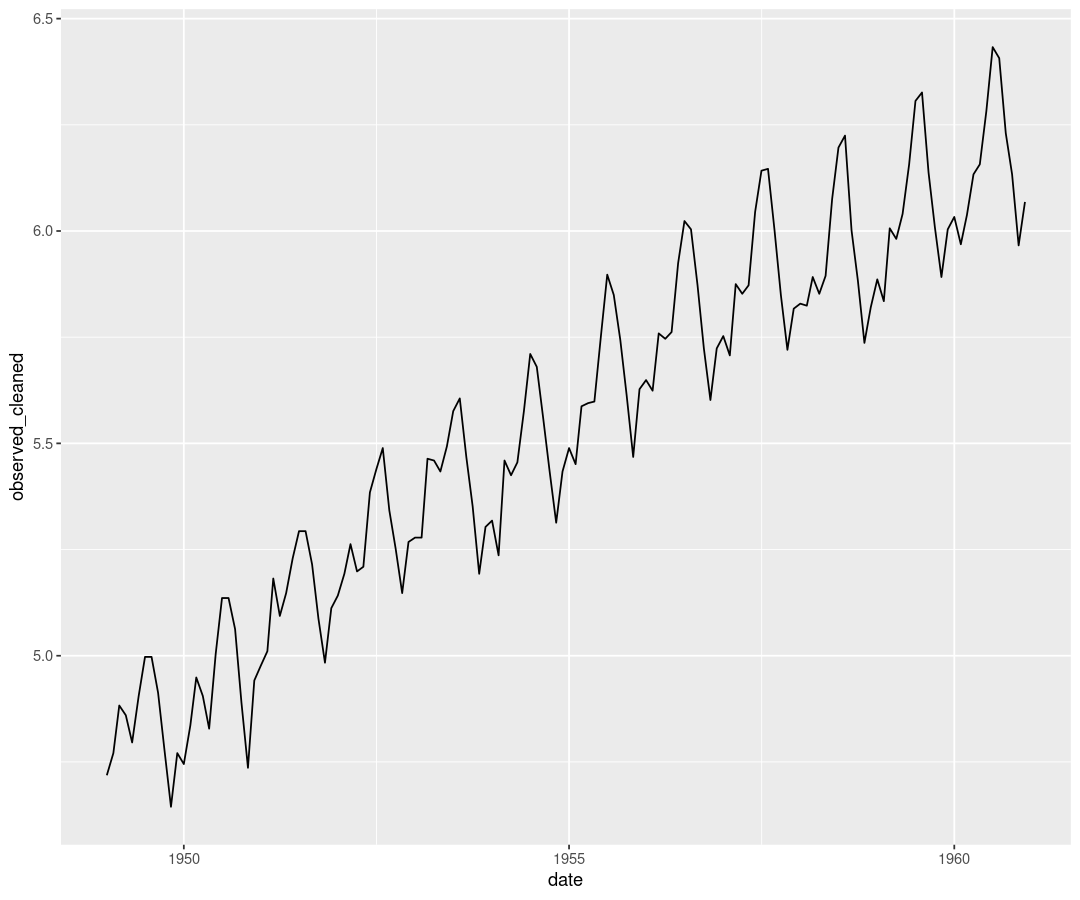

In [25]:
qplot(data=decomp4, x = date, y=observed_cleaned, geom='line')